# Import Libraries:-

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet,Lasso,LinearRegression,Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp,chi2_contingency,binomtest,f_oneway

# Data Loading:-

In [14]:
ds=pd.read_csv("E:/NareshiTech/admission_predict.csv")
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
ds=ds.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR','Chance of Admit ':'Chance_of_Admit'})

In [16]:
ds.shape

(500, 9)

- In this data set, We are having total 9 features including serial number and 500 rows.

In [17]:
ds.columns.to_list()

['Serial No.',
 'GRE_Score',
 'TOEFL_Score',
 'University_Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance_of_Admit']

# Columns:-

- **Serial No.:** Its jest serial number only. So, we can igone this column.

- **GRE Score:** Graduate Record Examination, which means GRE, is an important step in the graduate school or business school application process.

- **TOEFL Score:** Test of English as a Foreign Language, which means TOEFL, is an important step in the test for communications language of the applicants.

- **University Rating:** Every University has a its own rating based on pass percentage of the students rating.

- **SOP:** Statement of Purpose, (SOP) is a document that students prepare to demonstrate why they are applying to a specific course at a specific university. SOP aims to comprehend a candidate's background, reasons for choosing a particular career route, and objectives.

- **LOR:** Letter of Recommendation or LOR is a document that provides the admission officers with a comprehensive insight into your suitable candidature, for admission into the concerned University.  It aims to provide a favourable picture of your academic performance, strengths, experiences, achievements, contributions, and skills.

- **CGPA:** Cumulative Grade Point Average, For schools and colleges, CGPA is used to measure the overall academic achievement of a student by awarding A, B, C, D or F grades. CGPA is a calculation of the average grade point obtained in all subjects except in additional subjects as per the study scheme.

- **Research:** The Research column is shown whether person has done the any kind of research or not.

- **Chance of Admit:** This Chance of Admit column is shown whether person will get the admission or not based on above parameters.

In [18]:
ds.count()

Serial No.           500
GRE_Score            500
TOEFL_Score          500
University_Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance_of_Admit      500
dtype: int64

- columns are not having any null values. so, we can good to go.

In [19]:
ds.corr()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


## Correlation between columns:-
### GRE_Score:-

In [20]:
ds[['GRE_Score','TOEFL_Score']].corr()

,GRE_Score,TOEFL_Score
GRE_Score,1.0000,0.8272
TOEFL_Score,0.8272,1.0000


- GRE & TOEFL scores are having **0.8272%** of correlation between them.

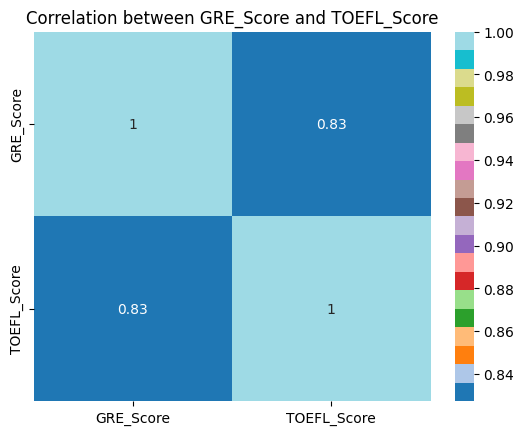

In [30]:
sns.heatmap(data=ds[['GRE_Score','TOEFL_Score']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and TOEFL_Score")
plt.show()

In [21]:
ds[['GRE_Score','University_Rating']].corr()

,GRE_Score,University_Rating
GRE_Score,1.000000,0.635376
University_Rating,0.635376,1.000000


- GRE scores & University Rating are having **0.635376%** of correlation between them.

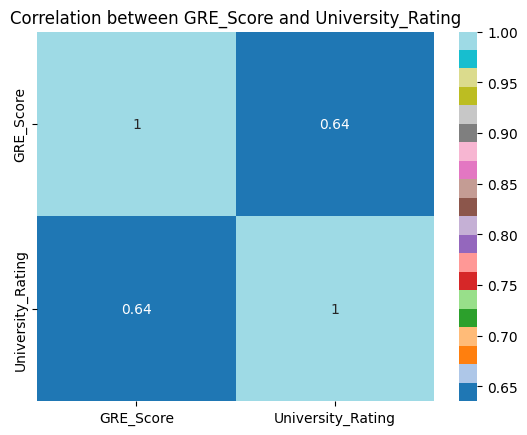

In [31]:
sns.heatmap(data=ds[['GRE_Score','University_Rating']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and University_Rating")
plt.show()

In [22]:
ds[['GRE_Score','SOP']].corr()

,GRE_Score,SOP
GRE_Score,1.000000,0.613498
SOP,0.613498,1.000000


- GRE scores & SOP are having **0.613498%** of correlation between them.

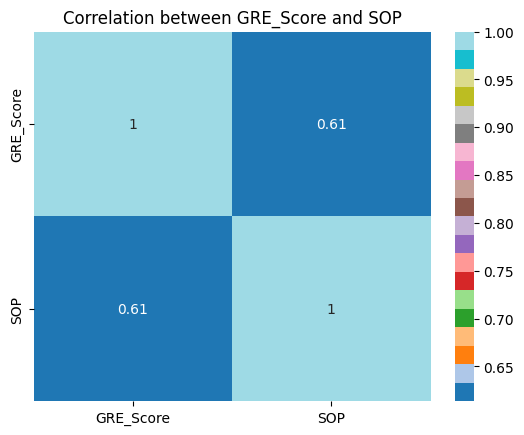

In [32]:
sns.heatmap(data=ds[['GRE_Score','SOP']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and SOP")
plt.show()

In [23]:
ds[['GRE_Score','LOR']].corr()

,GRE_Score,LOR
GRE_Score,1.000000,0.524679
LOR,0.524679,1.000000


- GRE scores & LOR are having **0.524679%** of correlation between them.

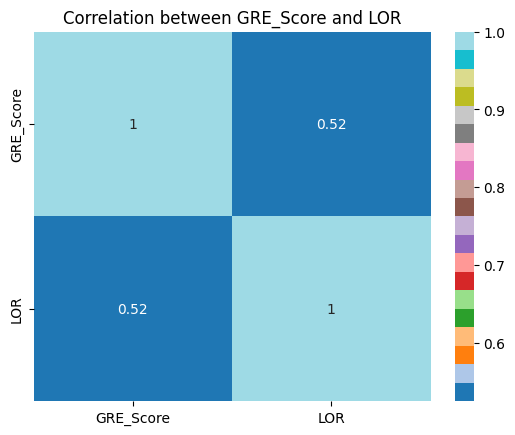

In [37]:
sns.heatmap(data=ds[['GRE_Score','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and LOR")
plt.show()

In [24]:
ds[['GRE_Score','CGPA']].corr()

,GRE_Score,CGPA
GRE_Score,1.000000,0.825878
CGPA,0.825878,1.000000


- GRE scores & CGPA are having **0.825878%** of correlation between them.

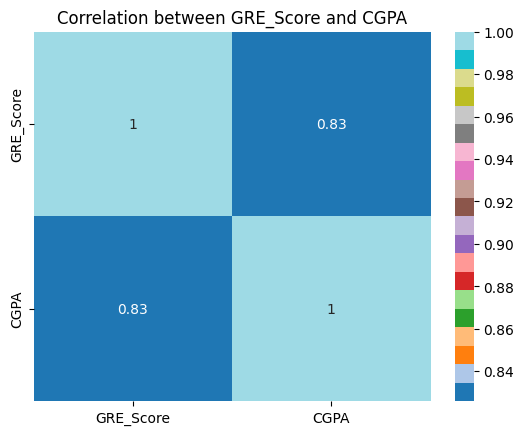

In [38]:
sns.heatmap(data=ds[['GRE_Score','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and CGPA")
plt.show()

In [25]:
ds[['GRE_Score','Research']].corr()

,GRE_Score,Research
GRE_Score,1.000000,0.563398
Research,0.563398,1.000000


- GRE scores & CGPA are having **0.563398%** of correlation between them.

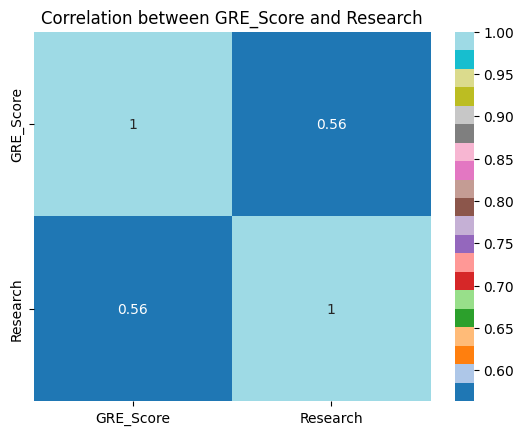

In [39]:
sns.heatmap(data=ds[['GRE_Score','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and Research")
plt.show()

In [26]:
ds[['GRE_Score','Chance_of_Admit']].corr()

,GRE_Score,Chance_of_Admit
GRE_Score,1.000000,0.810351
Chance_of_Admit,0.810351,1.000000


- GRE scores & Chance_of_Admit are having **0.810351%** of correlation between them.

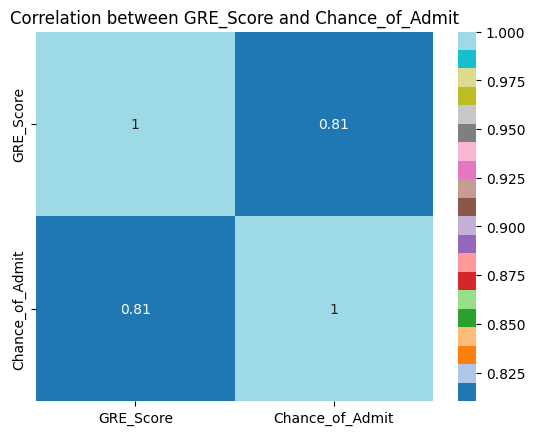

In [40]:
sns.heatmap(data=ds[['GRE_Score','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and Chance_of_Admit")
plt.show()

- columns are not having any null values. so, we can good to go.
- GRE & TOEFL scores are having 0.8272% of correlation between them.
- GRE scores & University Rating are having 0.635376% of correlation between them.
- GRE scores & SOP are having **0.613498%** of correlation between them.
- GRE scores & LOR are having **0.524679%** of correlation between them.
- GRE scores & CGPA are having **0.825878%** of correlation between them.
- GRE scores & CGPA are having **0.563398%** of correlation between them.
- GRE scores & Chance_of_Admit are having **0.810351%** of correlation between them.

- (GRE score & TOEFL score) and (GRE score & CGPA score) are having high correlation with respect **0.827% and 0.825%**.

### TOEFL_Score:-

In [27]:
ds.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
ds[['TOEFL_Score','University_Rating']].corr()

,TOEFL_Score,University_Rating
TOEFL_Score,1.000000,0.649799
University_Rating,0.649799,1.000000


- TOEFL_Score & University_Rating columns are having **0.649799%** of correlation between them.

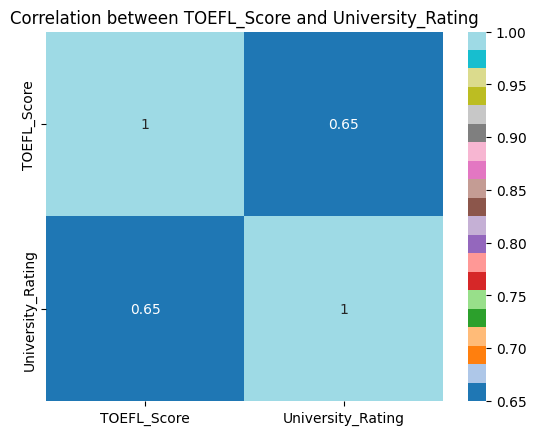

In [41]:
sns.heatmap(data=ds[['TOEFL_Score','University_Rating']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and University_Rating")
plt.show()

In [42]:
ds[['TOEFL_Score','SOP']].corr()

,TOEFL_Score,SOP
TOEFL_Score,1.00000,0.64441
SOP,0.64441,1.00000


- TOEFL_Score & SOP columns are having **0.64441%** of correlation between them.

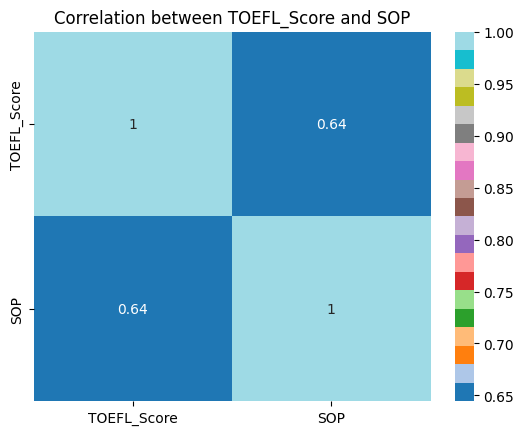

In [43]:
sns.heatmap(data=ds[['TOEFL_Score','SOP']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and SOP")
plt.show()

In [44]:
ds[['TOEFL_Score','LOR']].corr()

,TOEFL_Score,LOR
TOEFL_Score,1.000000,0.541563
LOR,0.541563,1.000000


- TOEFL_Score & LOR columns are having **0.541563%** of correlation between them.

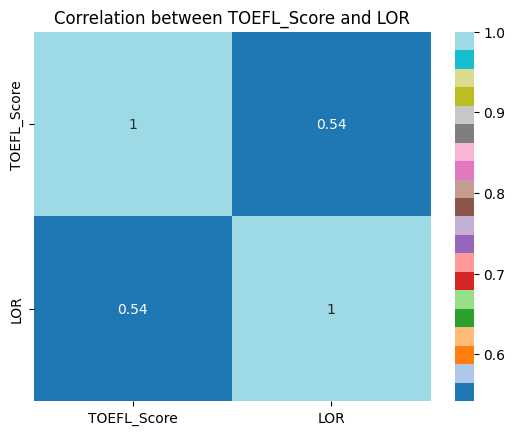

In [45]:
sns.heatmap(data=ds[['TOEFL_Score','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and LOR")
plt.show()

In [46]:
ds[['TOEFL_Score','CGPA']].corr()

,TOEFL_Score,CGPA
TOEFL_Score,1.000000,0.810574
CGPA,0.810574,1.000000


- TOEFL_Score & CGPA columns are having **0.810574%** of correlation between them.

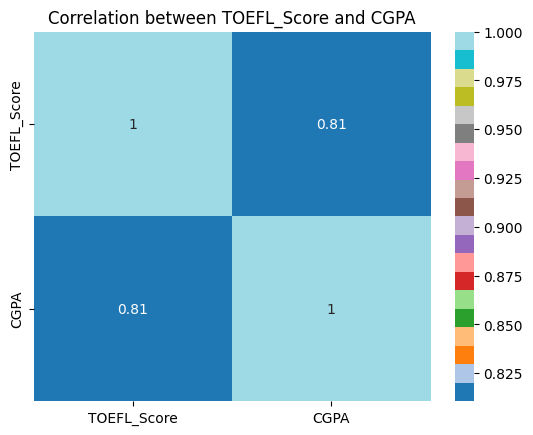

In [47]:
sns.heatmap(data=ds[['TOEFL_Score','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and CGPA")
plt.show()

In [48]:
ds[['TOEFL_Score','Research']].corr()

,TOEFL_Score,Research
TOEFL_Score,1.000000,0.467012
Research,0.467012,1.000000


- TOEFL_Score & Research columns are having **0.467012%** of correlation between them.

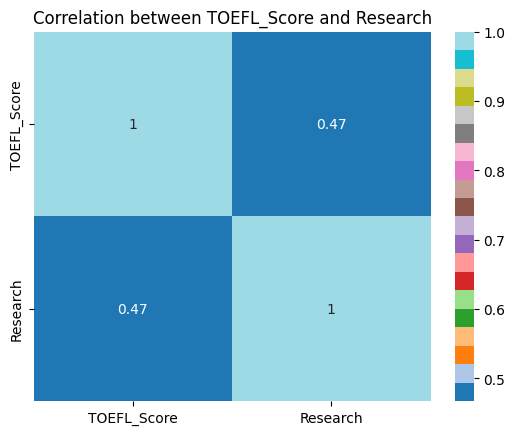

In [49]:
sns.heatmap(data=ds[['TOEFL_Score','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and Research")
plt.show()

In [50]:
ds[['TOEFL_Score','Chance_of_Admit']].corr()

,TOEFL_Score,Chance_of_Admit
TOEFL_Score,1.000000,0.792228
Chance_of_Admit,0.792228,1.000000


- TOEFL_Score & Chance_of_Admit columns are having **0.792228%** of correlation between them.

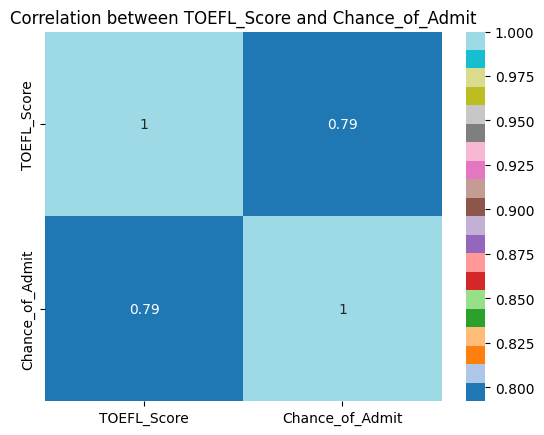

In [51]:
sns.heatmap(data=ds[['TOEFL_Score','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and Chance_of_Admit")
plt.show()